---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 4

---

Please write your full name here
- **Name** : "Mourad Magdy"

In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Part 1: SVM

### Use the following function to plot the classification regions

In [ ]:
import matplotlib.patches as mpatches


def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=0 and 25% of the data for testing)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#### Question 2
1. Train an SVM classifier using linear kernel.
2. Plot the classification regions using the training dataset.

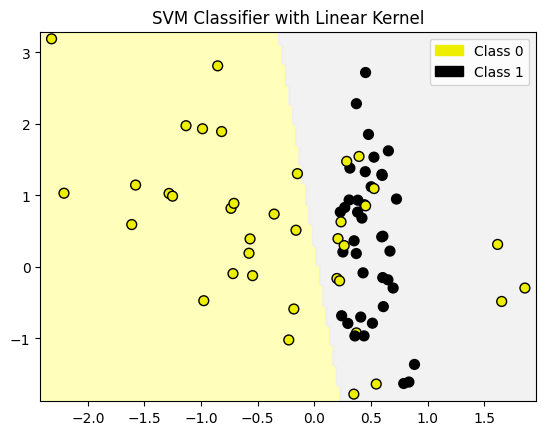

In [ ]:
from sklearn import svm
# clf=svm.LinearSVC()
clf = svm.SVC(kernel='linear')

clf.fit(X_train,y_train)
plot_class_regions_for_classifier(clf,X_train,y_train,title="SVM Classifier with Linear Kernel",target_names=['Class 0', 'Class 1'])


#### Question 3
1. Train an SVM classifier using linear kernel with C=0.0001.
2. Train another SVM classifier using linear kernel with C=95
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

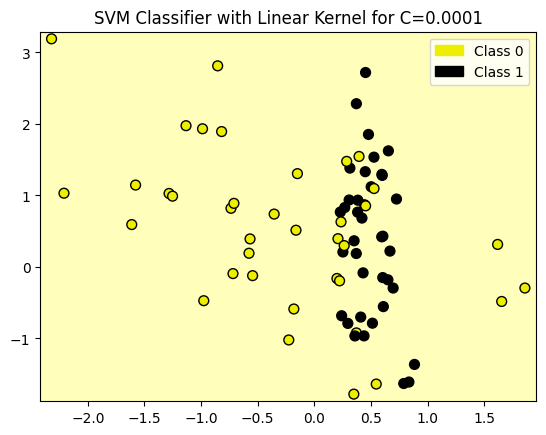

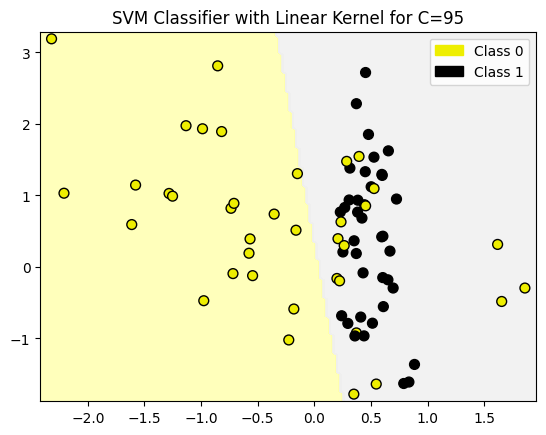

In [ ]:
clf1=svm.SVC(kernel='linear',C=0.0001)
clf2=svm.SVC(kernel='linear',C=95)

clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

plot_class_regions_for_classifier(clf1,X_train,y_train,title="SVM Classifier with Linear Kernel for C=0.0001",target_names=['Class 0', 'Class 1'])
plot_class_regions_for_classifier(clf2,X_train,y_train,title="SVM Classifier with Linear Kernel for C=95",target_names=['Class 0', 'Class 1'])



- Low value of C results in maximizing the maring over the classification of data, so the model seems to underfit the data

- High value of C results in maximizing the classification and smaller margin

### Use the fruits dataset in questions 4, 5, 6.

In [ ]:
import pandas as pd
fruits = pd.read_table('/content/Mourad Magdy - fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
fruits

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=0, and 25% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
X_fruits=fruits[feature_names_fruits]
y_fruits=fruits['fruit_label']

X_features=fruits[['height','width']]
X_train,X_test,y_train,y_test=train_test_split(X_features,y_fruits,test_size=0.25,random_state=0)

linearSVC=LinearSVC(random_state=0)
linearSVC.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0)

#### Question 5
For the previous model from question 4.
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

In [ ]:
# 4 classifiers have been trained because the number of classes is 4
print("LinearSVC Coeff is: ",linearSVC.coef_)

print("LinearSVC intercepts is: ",linearSVC.intercept_)

num_models_trained = len(linearSVC.classes_)

# Print the number of SVM models trained
print("Number of SVM models trained:", num_models_trained)



LinearSVC Coeff is:  [[-0.28033959  0.47977722]
 [-1.10773924  0.78994293]
 [-0.0352852   0.2298446 ]
 [ 1.01072336 -1.26188316]]
LinearSVC intercepts is:  [-1.53213304  0.7866717  -1.78182719  0.37214224]
Number of SVM models trained: 4


- 4 classifiers have been trained because the number of classes is 4





#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.
(plot it any way you can)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


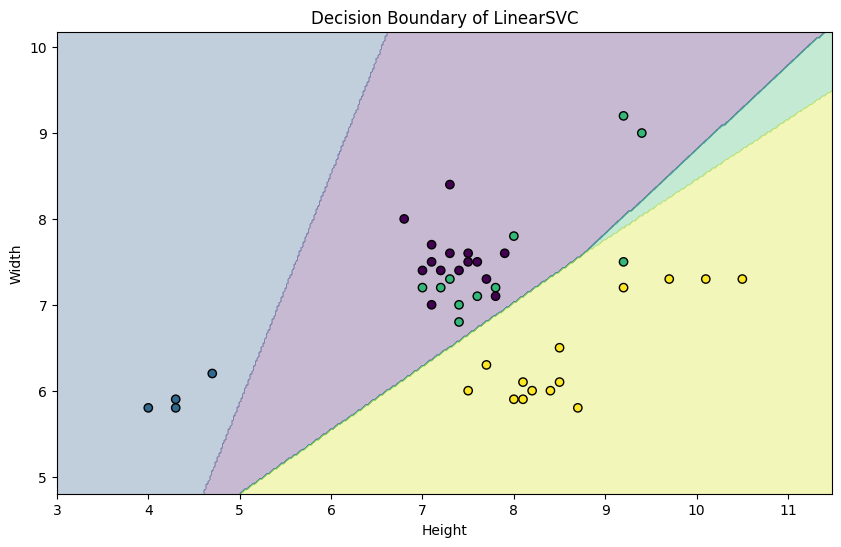

In [ ]:
def plot_decision_boundary(clf, X, y):
    # Plot decision boundary.
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Height')
    plt.ylabel('Width')
    plt.title('Decision Boundary of LinearSVC')

# Plot decision boundary of LinearSVC
plt.figure(figsize=(10, 6))
plot_decision_boundary(linearSVC, X_train.values, y_train.values)  # Convert to numpy arrays
plt.show()

 Use the breast cancer dataset in question 7, 8, and9.

In [ ]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 0, and 25% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.001, 0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

X_train,X_test,y_train,y_test=train_test_split(X_cancer,y_cancer,test_size=0.25,random_state=0)

parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.001, 0.01, 0.1, 0.5, 1, 10]}
clf = svm.SVC()

gs = GridSearchCV(clf,param_grid=parameters,refit=True,cv=10,n_jobs=None)

gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params:', gs.best_params_)

Best Accuracy: 91.31%
Best Params: {'C': 10, 'kernel': 'rbf'}


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

best_c=gs.best_params_['C']
clf=svm.SVC(kernel='rbf',C=best_c)
clf.fit(X_train,y_train)

y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)

training_accuracy=accuracy_score(y_train,y_train_pred)
testing_accuracy=accuracy_score(y_test,y_test_pred)

print("Training accuracy is: ",training_accuracy)
print("Testing accuracy is: ",testing_accuracy)

Training accuracy is:  0.9154929577464789
Testing accuracy is:  0.9370629370629371


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf.fit(X_train_scaled, y_train)

y_train_pred_scaled = clf.predict(X_train_scaled)
y_test_pred_scaled = clf.predict(X_test_scaled)

training_accuracy_scaled = accuracy_score(y_train, y_train_pred_scaled)
testing_accuracy_scaled = accuracy_score(y_test, y_test_pred_scaled)

print("Training accuracy after scaling:", training_accuracy_scaled)
print("Testing accuracy after scaling:", testing_accuracy_scaled)

Training accuracy after scaling: 0.9882629107981221
Testing accuracy after scaling: 0.972027972027972
